# IDR Drop

Implements batch tasks used for IDR drops.

In [12]:
import pandas as pd
import numpy as np
import cx_Oracle
import db_connect
import IDRdrop
import json
import os
print('imported modules successfully.')

imported modules successfully.


## Show downloaded files from EPO portal

Here *filepath* is a directory containing downloaded EPO files. Code will print 20 most recent files.

In [13]:
readpath = 'C:\\Users\\wb5888\\Downloads'

myfiles = IDRdrop.show_dir(readpath, 20)
print(myfiles)

files found in dir:  C:\Users\wb5888\Downloads
                                                files                time
0   eversource_1483355e-8390-4592-ae50-9d14d7a0b22... 2020-02-27 14:17:36
1                              install-tl-windows.exe 2020-02-27 14:08:31
2   ngrid_0da015f9-8d36-45f4-a706-e0423f1e3082_b7d... 2020-02-27 12:46:30
3                                           Documents 2020-02-27 10:08:52
4                                          windows_dl 2020-02-27 10:02:47
5   eversource_657ac7ac-dc82-402f-a2ab-a304d5ff372... 2020-02-27 09:45:21
6   eversource_71629281-0c57-44b1-a1c0-679b2d9f1bb... 2020-02-27 09:36:53
7   eversource_71629281-0c57-44b1-a1c0-679b2d9f1bb... 2020-02-27 09:36:24
8   eversource_71629281-0c57-44b1-a1c0-679b2d9f1bb... 2020-02-27 09:36:01
9   eversource_71629281-0c57-44b1-a1c0-679b2d9f1bb... 2020-02-27 09:35:37
10                                        desktop.ini 2020-02-27 07:11:35


Choose files to split into Raw IDR files.

In [14]:
index = [0]

splitfiles = list(myfiles.files[index])
print(splitfiles)

['eversource_1483355e-8390-4592-ae50-9d14d7a0b222_68d0c5ba_hourlycsv.csv']


## Batch process downloaded EPO files into Raw IDRs

In [15]:
readpath = 'C:\\Users\\wb5888\\Downloads'
writepath = 'C:\\Users\\wb5888\\Documents\\la-tools-test\\IDR_Drop\\Raw_IDR'
utility = 'CLP'
accts = None
error_log = []

for file in splitfiles:
    try:
        os.chdir(readpath)
        filedf = pd.read_csv(file, sep = ",", header = 0)
    
        IDRdrop.raw_split(filedf, readpath, writepath, utility, accts)
        print('success, file: ', file)
        
    except:
        error_log = error_log.append(file)
        print('error, file: ', file)

found 1 accounts.
CLP_700205081_IDR_RAW.csv  written.
success, file:  eversource_1483355e-8390-4592-ae50-9d14d7a0b222_68d0c5ba_hourlycsv.csv


## Show Raw IDR files based on utility

Here *rawpath* is directory containing Raw IDRs - 25 most recent will be shown.

In [16]:
rawfiles = IDRdrop.show_dir(writepath, 20)
print(rawfiles)

files found in dir:  C:\Users\wb5888\Documents\la-tools-test\IDR_Drop\Raw_IDR
                                    files                time
0   CLP_51700205081_622872008_IDR_RAW.csv 2020-02-27 14:17:51
1              NRI_4015598011_IDR_RAW.csv 2020-02-27 12:46:56
2               CLP_535566087_IDR_RAW.csv 2020-02-27 10:31:54
3                CLP_91802009_IDR_RAW.csv 2020-02-27 10:31:54
4               CLP_844893032_IDR_RAW.csv 2020-02-27 10:31:54
5               CLP_792442055_IDR_RAW.csv 2020-02-27 10:31:54
6               CLP_680805074_IDR_RAW.csv 2020-02-27 10:31:54
7               CLP_553942046_IDR_RAW.csv 2020-02-27 10:31:54
8               CLP_127634061_IDR_RAW.csv 2020-02-27 10:31:54
9               CLP_200052082_IDR_RAW.csv 2020-02-27 10:31:54
10              CLP_525702049_IDR_RAW.csv 2020-02-27 10:31:53
11              CLP_703603001_IDR_RAW.csv 2020-02-27 10:31:53
12               CLP_71542062_IDR_RAW.csv 2020-02-27 10:31:53
13              CLP_260742044_IDR_RAW.csv 2020-02-27 1

Choose Raw IDRs to filter into IDR files.

In [17]:
index = [0]

processfiles = rawfiles.files[index]
files = list(processfiles)
print('files to process: ')
print(processfiles)

files to process: 
0    CLP_51700205081_622872008_IDR_RAW.csv
Name: files, dtype: object


## Batch filter Raw IDR into IDR files to be dropped

In [18]:
readpath = 'C:\\Users\\wb5888\\Documents\\la-tools-test\\IDR_Drop\\Raw_IDR'
writepath = 'C:\\Users\\wb5888\\Documents\\la-tools-test\\IDR_Drop\\IDR'
error_log = []

for dropfile in files:

    try:
        IDRdrop.data_drop(dropfile, readpath, writepath)
        print('success, file: ', dropfile)
    
    except:
        try:
            error_log.append(dropfile)
        except:
            pass
    

overlap removed at 3/26/2019, for file:
success, file:  CLP_51700205081_622872008_IDR_RAW.csv


In [8]:
type(error_log)
error_log

[]

## Change meters to vertical

In [19]:
data_dir = 'C:\\Users\\wb5888\\Documents\\la-tools-test\\IDR_Drop\\IDR'
os.chdir(data_dir)
idr = IDRdrop.show_dir(data_dir, 10)
print(idr)

files found in dir:  C:\Users\wb5888\Documents\la-tools-test\IDR_Drop\IDR
                                     files                time
0        CLP_51700205081_622872008_IDR.csv 2020-02-27 14:18:47
1      CLP_51700205081_622872008_IDR_3.csv 2020-02-27 14:18:47
2   CLP_51792442055_941071006_IDR_vert.csv 2020-02-27 13:52:12
3   CLP_51703603001_928602002_IDR_vert.csv 2020-02-27 13:52:09
4              NRI_4015598011_IDR_vert.csv 2020-02-27 12:49:54
5                   NRI_4015598011_IDR.csv 2020-02-27 12:47:07
6                             fangfang.zip 2020-02-27 11:02:52
7                                 fangfang 2020-02-27 11:02:02
8  CLP_51525702049_673841000 _IDR_vert.csv 2020-02-27 10:32:59
9   CLP_51535566087_298162000_IDR_vert.csv 2020-02-27 10:32:58


In [20]:
myfiles = idr.files[index]
for f in myfiles:
    IDRdrop.hor_to_vert(f)

transformed and wrote CLP_51700205081_622872008_IDR.csv to CLP_51700205081_622872008_IDR_vert.csv.


## Plot data

In [21]:
idr = IDRdrop.show_dir(data_dir, 10)
print(idr)

files found in dir:  C:\Users\wb5888\Documents\la-tools-test\IDR_Drop\IDR
                                     files                time
0   CLP_51700205081_622872008_IDR_vert.csv 2020-02-27 14:19:15
1        CLP_51700205081_622872008_IDR.csv 2020-02-27 14:18:47
2      CLP_51700205081_622872008_IDR_3.csv 2020-02-27 14:18:47
3   CLP_51792442055_941071006_IDR_vert.csv 2020-02-27 13:52:12
4   CLP_51703603001_928602002_IDR_vert.csv 2020-02-27 13:52:09
5              NRI_4015598011_IDR_vert.csv 2020-02-27 12:49:54
6                   NRI_4015598011_IDR.csv 2020-02-27 12:47:07
7                             fangfang.zip 2020-02-27 11:02:52
8                                 fangfang 2020-02-27 11:02:02
9  CLP_51525702049_673841000 _IDR_vert.csv 2020-02-27 10:32:59


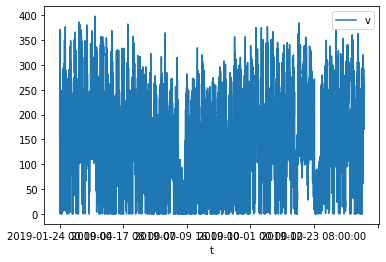

In [22]:
idr_df = pd.read_csv(idr.files[0], names = ['t', 'v'])
idr_df.set_index('t', inplace = True, drop = True)
idr_df.plot(y = 'v')

## Generate/get scalar, get tags

## Create datasource

## EWX API